In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import scipy.stats as stats

In [2]:
rcParams_dict = {
    'font.size': 15,
    'pdf.fonttype':42,
    'font.family':'Arial',
    'mathtext.fontset':'custom',
    'mathtext.default': 'regular',
    'mathtext.it': 'Arial:italic',
    'mathtext.it': 'Arial:italic',
}
mpl.rcParams.update(rcParams_dict)

In [3]:
# Uncomment if you want to re-parse the raw codeml results
# for gene_set in ['selected', 'NC']:
    
#     summary_dict = {
#         'FB_name':[], 'N_orthologs':[], 'dN':[]
#     }
#     file_list = [f for f in os.listdir(f'./data/Drosophila_PAML_analysis/{gene_set}/') if f.endswith('.txt')]
    
#     N_available = 0
#     for file in file_list:
#         # print(file)
#         dN_list = []
#         N_orthologs = 0
#         sp_set = set()
#         FB_name = file.split('.')[0]
#         with open(f'./data/Drosophila_PAML_analysis/{gene_set}/{file}','r') as f:
#             dN = np.nan
#             while True:
#                 line = f.readline()
#                 #print(line)
#                 if not line:
#                     break
#                 if line[:2] == 'ns':
#                     N_orthologs = re.search(r'ns =\s+([0-9]*?)\s+',line).group(1)
#                 if '...' in line:
#                     sp1, sp2 = re.findall(r'\((.*?):',line)
#                     #sp_set.add(sp1)
#                     #sp_set.add(sp2)
#                 if (line[:2] == 't=') and (sp1 == 'Dsim') and (sp2 == 'Dmel'): # between D. simulans and D. melanogaster
#                     dN = re.search(r'dN =\s+(.*?)\s+',line).group(1)
#                     dN = float(dN)
#                     N_available += 1
#                     break
                    
#             summary_dict['FB_name'].append(FB_name)
#             summary_dict['N_orthologs'].append(N_orthologs)
#             summary_dict['dN'].append(dN)
    
#     summary_df = pd.DataFrame(summary_dict).sort_values('FB_name').dropna()
#     summary_df.to_csv(f'./data/{gene_set}_dN_summary_Dmel_vs_Dsim.csv',index=False)
        

In [4]:
selected_df = pd.read_csv('./data/selected_dN_summary_Dmel_vs_Dsim.csv')
NC_df = pd.read_csv('./data/NC_dN_summary_Dmel_vs_Dsim.csv')

(-0.01, 0.12)

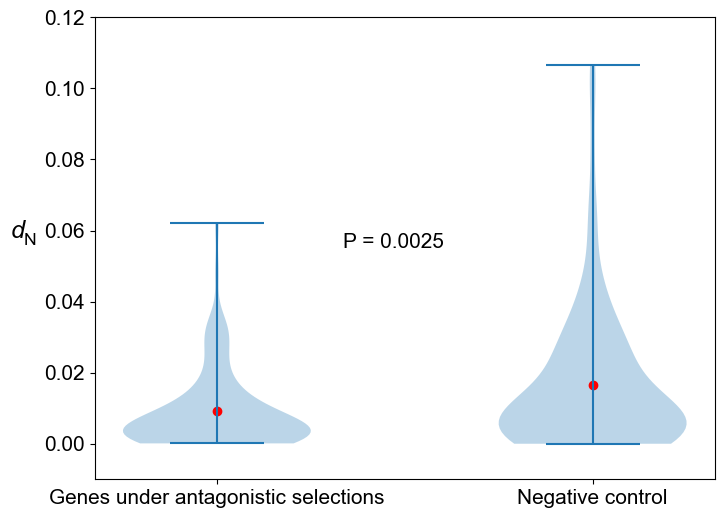

In [5]:
fig,ax = plt.subplots(figsize=[8,6],facecolor='w')
plt.violinplot(
    [selected_df['dN'].dropna(),NC_df['dN'].dropna()],
)
plt.scatter(1,selected_df['dN'].mean(),color='r')
plt.scatter(2,NC_df['dN'].mean(),color='r')
plt.xticks(
    ticks=[1,2],
    labels=[
        #f"Genes under aantagonistic selections\nN = {selected_df['dN'].notna().sum()}",
        #f"Negative control\nN = {NC_df['dN'].notna().sum()}"
        f"Genes under antagonistic selections",
        f"Negative control"
    ]
)
plt.ylabel('$\mathit{d}_N$', rotation=0, labelpad=15, size=18)
result = stats.ttest_ind(selected_df['dN'].dropna(),NC_df['dN'].dropna())
plt.text(x=0.4,y=0.5,s=f'P = {result.pvalue:.4f}',transform=ax.transAxes)
plt.ylim(-0.01,0.12)

#plt.savefig('FigS4.pdf')